In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations. 
lats = np.random.uniform(low = -90.000, high = 90.000, size=1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [6]:
import requests
# Import the API key.
from config import weather_api_key
requests.__version__

'2.24.0'

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6f69822185a74de01c8ce51262da1787


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [29]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | araouane
Processing Record 2 of Set 1 | butaritari
Processing Record 3 of Set 1 | taoudenni
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 7 of Set 1 | hilo
Processing Record 8 of Set 1 | carnarvon
Processing Record 9 of Set 1 | torbay
Processing Record 10 of Set 1 | la grande
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | mar del plata
Processing Record 13 of Set 1 | samarina
Processing Record 14 of Set 1 | mouila
Processing Record 15 of Set 1 | beisfjord
Processing Record 16 of Set 1 | samfya
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | vanavara
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | kapaa
Processing Record 21 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 22 of 

Processing Record 37 of Set 4 | buzdyak
Processing Record 38 of Set 4 | aasiaat
Processing Record 39 of Set 4 | lipin bor
Processing Record 40 of Set 4 | severo-kurilsk
Processing Record 41 of Set 4 | soyo
Processing Record 42 of Set 4 | espoo
Processing Record 43 of Set 4 | sobolevo
Processing Record 44 of Set 4 | gold coast
Processing Record 45 of Set 4 | churhat
Processing Record 46 of Set 4 | udachnyy
Processing Record 47 of Set 4 | laje
Processing Record 48 of Set 4 | bluff
Processing Record 49 of Set 4 | pundaguitan
Processing Record 50 of Set 4 | springbok
Processing Record 1 of Set 5 | inderborskiy
City not found. Skipping...
Processing Record 2 of Set 5 | pochutla
Processing Record 3 of Set 5 | jalu
Processing Record 4 of Set 5 | gigmoto
Processing Record 5 of Set 5 | mount isa
Processing Record 6 of Set 5 | baghdad
Processing Record 7 of Set 5 | netarhat
Processing Record 8 of Set 5 | nikolskoye
Processing Record 9 of Set 5 | kyra
Processing Record 10 of Set 5 | lafiagi
Proce

Processing Record 28 of Set 8 | cabra
Processing Record 29 of Set 8 | kununurra
Processing Record 30 of Set 8 | ferme-neuve
Processing Record 31 of Set 8 | murdochville
Processing Record 32 of Set 8 | santa cruz de la palma
Processing Record 33 of Set 8 | palmas bellas
Processing Record 34 of Set 8 | evans
Processing Record 35 of Set 8 | bosaso
Processing Record 36 of Set 8 | haapiti
Processing Record 37 of Set 8 | destin
Processing Record 38 of Set 8 | artyk
City not found. Skipping...
Processing Record 39 of Set 8 | caico
Processing Record 40 of Set 8 | novorossiysk
Processing Record 41 of Set 8 | gushikawa
Processing Record 42 of Set 8 | namibe
Processing Record 43 of Set 8 | evensk
Processing Record 44 of Set 8 | salinopolis
Processing Record 45 of Set 8 | nouadhibou
Processing Record 46 of Set 8 | aljezur
Processing Record 47 of Set 8 | san juan
Processing Record 48 of Set 8 | samusu
City not found. Skipping...
Processing Record 49 of Set 8 | llandrindod wells
Processing Record 50

Processing Record 17 of Set 12 | fairbanks
Processing Record 18 of Set 12 | traralgon
Processing Record 19 of Set 12 | nortelandia
Processing Record 20 of Set 12 | touros
Processing Record 21 of Set 12 | novopokrovka
Processing Record 22 of Set 12 | hay river
Processing Record 23 of Set 12 | magadan
Processing Record 24 of Set 12 | laiyang
Processing Record 25 of Set 12 | banjar
Processing Record 26 of Set 12 | hargeysa
Processing Record 27 of Set 12 | churapcha
Processing Record 28 of Set 12 | tucuman
Processing Record 29 of Set 12 | montepuez
Processing Record 30 of Set 12 | tutoia
Processing Record 31 of Set 12 | skagastrond
City not found. Skipping...
Processing Record 32 of Set 12 | lavrentiya
Processing Record 33 of Set 12 | warqla
City not found. Skipping...
Processing Record 34 of Set 12 | grenfell
Processing Record 35 of Set 12 | ormara
Processing Record 36 of Set 12 | saint george
Processing Record 37 of Set 12 | los andes
Processing Record 38 of Set 12 | byron bay
Processing

In [10]:
len(city_data)

573

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Araouane,18.9048,-3.5265,59.11,25,67,10.33,ML,2021-01-24 05:55:28
1,Butaritari,3.0707,172.7902,80.04,77,63,7.49,KI,2021-01-24 05:55:28
2,Taoudenni,22.6783,-3.9836,59.81,29,0,9.80,ML,2021-01-24 05:55:28
3,Jamestown,42.0970,-79.2353,17.60,79,90,5.75,US,2021-01-24 05:55:28
4,Busselton,-33.6500,115.3333,75.99,50,48,3.00,AU,2021-01-24 05:55:29
5,Hilo,19.7297,-155.0900,71.60,83,90,5.75,US,2021-01-24 05:55:29
6,Carnarvon,-24.8667,113.6333,82.40,51,13,13.80,AU,2021-01-24 05:55:29
7,Torbay,47.6666,-52.7314,24.01,80,40,27.63,CA,2021-01-24 05:55:29
8,La Grande,45.3246,-118.0877,26.01,80,0,3.51,US,2021-01-24 05:53:53
9,Rikitea,-23.1203,-134.9692,79.47,66,5,7.74,PF,2021-01-24 05:55:30


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [13]:
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Araouane,ML,2021-01-24 05:55:28,18.9048,-3.5265,59.11,25,67,10.33
1,Butaritari,KI,2021-01-24 05:55:28,3.0707,172.7902,80.04,77,63,7.49
2,Taoudenni,ML,2021-01-24 05:55:28,22.6783,-3.9836,59.81,29,0,9.80
3,Jamestown,US,2021-01-24 05:55:28,42.0970,-79.2353,17.60,79,90,5.75
4,Busselton,AU,2021-01-24 05:55:29,-33.6500,115.3333,75.99,50,48,3.00


In [14]:
# Create the output file (CSV).
output_data_file = "Weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

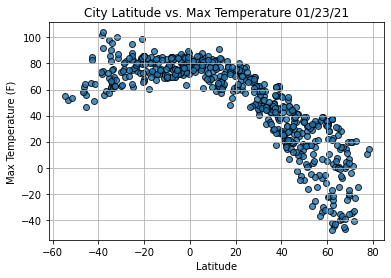

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

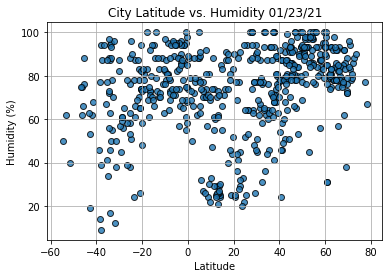

In [17]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

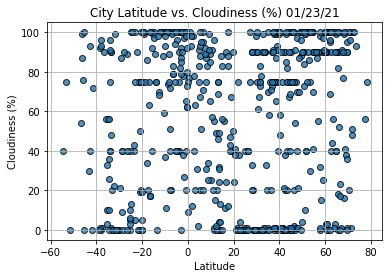

In [18]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

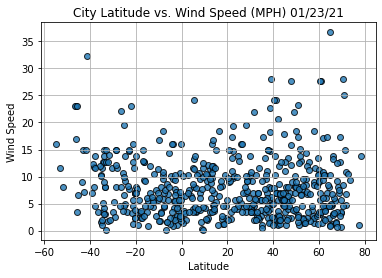

In [19]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed (MPH) "+ time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [21]:
index13 = city_data_df.loc[13]
index13

City                    Beisfjord
Country                        NO
Date          2021-01-24 05:55:31
Lat                       68.3751
Lng                       17.5988
Max Temp                       14
Humidity                       62
Cloudiness                     16
Wind Speed                   8.05
Name: 13, dtype: object

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Araouane,ML,2021-01-24 05:55:28,18.9048,-3.5265,59.11,25,67,10.33
1,Butaritari,KI,2021-01-24 05:55:28,3.0707,172.7902,80.04,77,63,7.49
2,Taoudenni,ML,2021-01-24 05:55:28,22.6783,-3.9836,59.81,29,0,9.80
3,Jamestown,US,2021-01-24 05:55:28,42.0970,-79.2353,17.60,79,90,5.75
5,Hilo,US,2021-01-24 05:55:29,19.7297,-155.0900,71.60,83,90,5.75


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

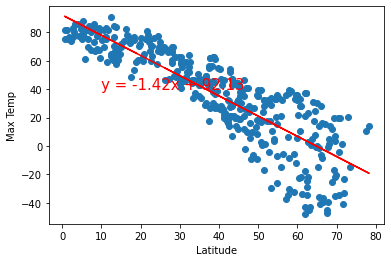

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

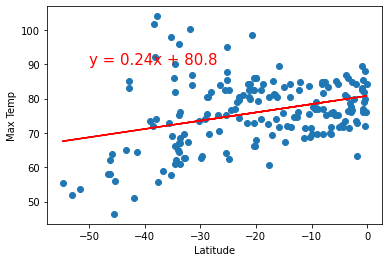

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

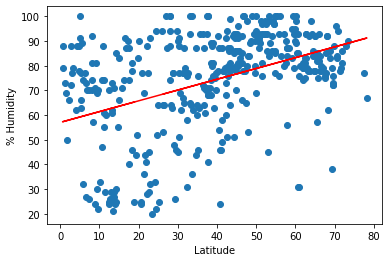

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

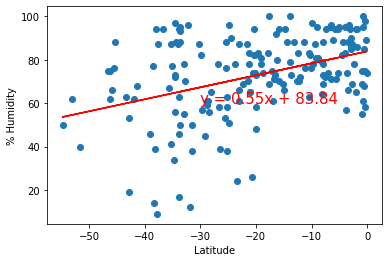

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-30,60))


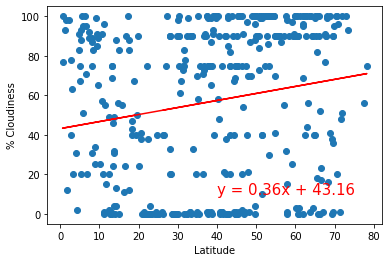

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

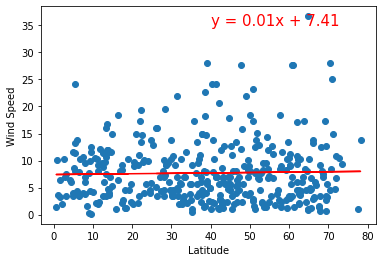

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

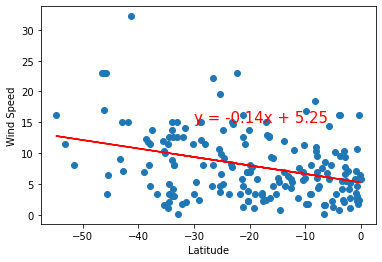

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-30,15))